In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA

In [41]:
# Read the cleaned historical data from ..data/raw
one_bed_flat = pd.read_csv('../data/raw/cleaned 1 bedroom flat.csv')
two_bed_flat = pd.read_csv('../data/raw/cleaned 2 bedroom flat.csv')
three_bed_flat = pd.read_csv('../data/raw/cleaned 3 bedroom flat.csv')
two_bed_house = pd.read_csv('../data/raw/cleaned 2 bedroom house.csv')
three_bed_house = pd.read_csv('../data/raw/cleaned 3 bedroom house.csv')
four_bed_house = pd.read_csv('../data/raw/cleaned 4 bedroom house.csv')
all_properties = pd.read_csv('../data/raw/cleaned all properties.csv')

> ### Visualisation

In [42]:
one_bed_flat.set_index('suburb', inplace=True)
two_bed_flat.set_index('suburb', inplace=True)
three_bed_flat.set_index('suburb', inplace=True)
two_bed_house.set_index('suburb', inplace=True)
three_bed_house.set_index('suburb', inplace=True)
four_bed_house.set_index('suburb', inplace=True)
all_properties.set_index('suburb', inplace=True)

In [43]:
# Remove any extra characters besides month and year in column name
all_properties.columns = all_properties.columns.str.extract(r'([a-zA-Z]+\s?\d{4})')[0]
all_properties.columns = pd.to_datetime(all_properties.columns, format='%b %Y')

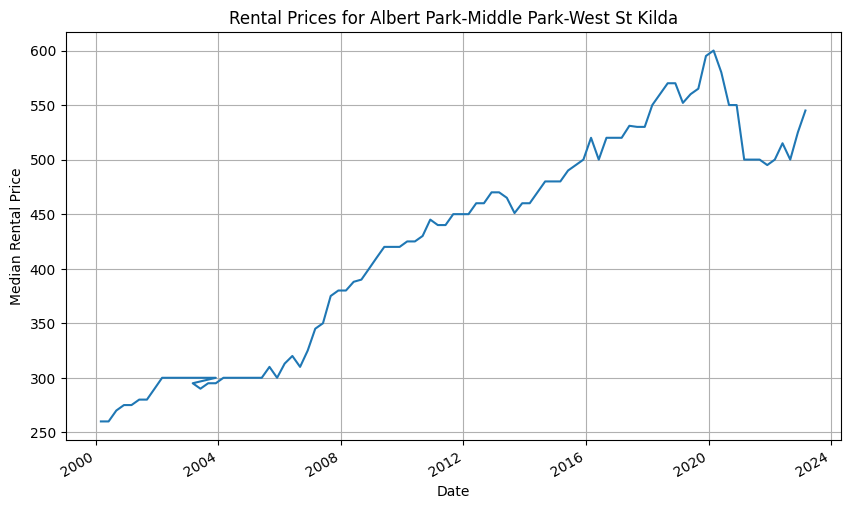

In [44]:
# Extract data for the first suburb
first_suburb = all_properties.index[0]
rental_prices = all_properties.loc[first_suburb]

# Plot the time series
plt.figure(figsize=(10, 6))
rental_prices.plot()
plt.title(f'Rental Prices for {first_suburb}')
plt.xlabel('Date')
plt.ylabel('Median Rental Price')
plt.grid(True)
plt.show()

In [73]:

# Define the ARIMA model
model = ARIMA(rental_prices, order=(1, 1, 1))  # Adjust the (p, d, q) parameters as needed

# Fit the ARIMA model
model_fit = model.fit()

/home/lqp303203/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/lqp303203/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/lqp303203/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/lqp303203/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

In [76]:
forecast = model_fit.forecast(steps=forecast_periods)
forecast_dates = pd.date_range(start=all_properties.columns[-1] + pd.DateOffset(months=3), periods=forecast_periods, freq='Q')
forecast_df = pd.DataFrame({
    'forecast_dates': forecast_dates,
    'forecast_values': forecast
})
print(forecast_df)

    forecast_dates  forecast_values
93      2023-06-30       548.299184
94      2023-09-30       551.056278
95      2023-12-31       553.360353
96      2024-03-31       555.285845
97      2024-06-30       556.894958
98      2024-09-30       558.239677
99      2024-12-31       559.363445
100     2025-03-31       560.302566
101     2025-06-30       561.087380
102     2025-09-30       561.743241
103     2025-12-31       562.291337
104     2026-03-31       562.749376
105     2026-06-30       563.132153
106     2026-09-30       563.452037
107     2026-12-31       563.719360


/home/lqp303203/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/home/lqp303203/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/tmp/ipykernel_245819/4211035844.py:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates = pd.date_range(start=all_properties.columns[-1] + pd.DateOffset(months=3), periods=forecast_periods, freq='Q')


In [56]:
forecast_periods = 15

# Store results in a dictionary
forecast_results = {}

for suburb in all_properties.index:
    # Extract time series for the suburb
    ts = all_properties.loc[suburb]
    
    # Define the ARIMA model
    model = ARIMA(ts, order=(1, 1, 1))  # Adjust the (p, d, q) parameters as needed
    
    # Fit the ARIMA model
    model_fit = model.fit()
    
    # Forecast future values
    forecast = model_fit.forecast(steps=forecast_periods)
    # Store forecasted values
    forecast_results[suburb] = forecast

/home/lqp303203/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/lqp303203/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/lqp303203/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/home/lqp303203/.local/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq

In [77]:
# Print the forecast results for each suburb
for suburb, forecast in forecast_results.items():
    print(f"\nForecast for {suburb}:")
    forecast_dates = pd.date_range(start=all_properties.columns[-1] + pd.DateOffset(months=3), periods=forecast_periods, freq='Q')
    forecast_df = pd.DataFrame({
    'forecast_dates': forecast_dates,
    'forecast_values': forecast
    })
    print(forecast_df)


Forecast for Albert Park-Middle Park-West St Kilda:
    forecast_dates  forecast_values
93      2023-06-30       548.299184
94      2023-09-30       551.056278
95      2023-12-31       553.360353
96      2024-03-31       555.285845
97      2024-06-30       556.894958
98      2024-09-30       558.239677
99      2024-12-31       559.363445
100     2025-03-31       560.302566
101     2025-06-30       561.087380
102     2025-09-30       561.743241
103     2025-12-31       562.291337
104     2026-03-31       562.749376
105     2026-06-30       563.132153
106     2026-09-30       563.452037
107     2026-12-31       563.719360

Forecast for Armadale:
    forecast_dates  forecast_values
93      2023-06-30       504.255944
94      2023-09-30       514.525446
95      2023-12-31       521.923250
96      2024-03-31       527.252380
97      2024-06-30       531.091306
98      2024-09-30       533.856739
99      2024-12-31       535.848864
100     2025-03-31       537.283924
101     2025-06-30     

/tmp/ipykernel_245819/32581310.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates = pd.date_range(start=all_properties.columns[-1] + pd.DateOffset(months=3), periods=forecast_periods, freq='Q')
/tmp/ipykernel_245819/32581310.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates = pd.date_range(start=all_properties.columns[-1] + pd.DateOffset(months=3), periods=forecast_periods, freq='Q')
/tmp/ipykernel_245819/32581310.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates = pd.date_range(start=all_properties.columns[-1] + pd.DateOffset(months=3), periods=forecast_periods, freq='Q')
/tmp/ipykernel_245819/32581310.py:4: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_dates = pd.date_range(start=all_properties.columns[-1] + p